## Strategies to Deal with Imbalanced Data

1. Over samplin
2. Under samplin
3. SMOT
4. Cost function with weight
5. Tunning Hyperparameter

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from plotnine import *

In [2]:
train_set = pd.read_csv("../../fraud_data/fraudTrain.csv")

In [3]:
train_set.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [5]:
train_set.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [6]:
train_set.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [7]:
count_is_fraud = pd.DataFrame(train_set.groupby('is_fraud')['is_fraud'].aggregate(qty_n = 'count'))
count_is_fraud.index.name = "is_fraud"
count_is_fraud.reset_index(inplace=True)
count_is_fraud['is_fraud'] = count_is_fraud.is_fraud.astype('category')

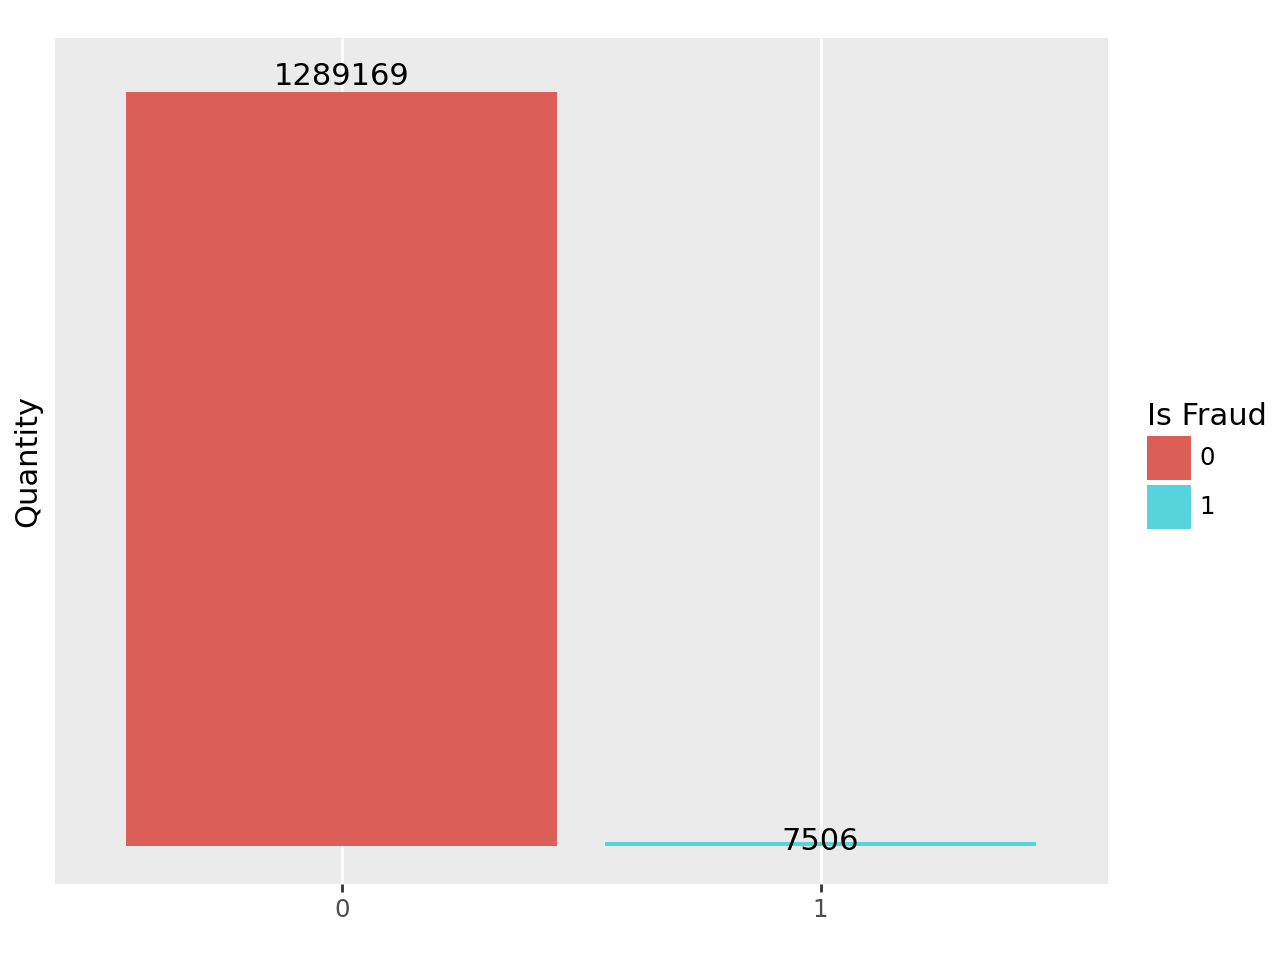

<Figure Size: (640 x 480)>

In [8]:
(
    ggplot(data=count_is_fraud)+
    geom_col(aes(x='is_fraud', y='qty_n', fill='is_fraud'))+
    scale_y_continuous(
        name='Quantity',
        labels="",
        breaks=""
    )+
    geom_text(aes(x='is_fraud', y='qty_n', label='qty_n'), position=position_stack(vjust=1.02))+
    labs(x="", fill="Is Fraud")
)

In [31]:
train_set_final = train_set.drop(['cc_num', 'first', 'last', 'street', 'city', 'state', 'zip', 'trans_num', 'merchant'], axis=1)

### CatBoost for Calssification Model

In [9]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict, cross_val_score
from sklearn.metrics  import f1_score, recall_score, roc_auc_score, roc_curve, precision_recall_curve, precision_score
from catboost import CatBoostClassifier

In [32]:
features = train_set_final.drop(['is_fraud'], axis=1)
target = train_set_final['is_fraud']

In [36]:
cat_features = list(train_set_final.select_dtypes("object").columns.to_list())
cat_features_index = [train_set_final.columns.get_loc(col) for col in cat_features]

In [37]:
train_x, validation_x, train_y, validation_y = train_test_split(features, target, test_size=0.7, random_state=1234)

In [38]:
cat_boost = CatBoostClassifier(cat_features=cat_features_index, loss_function="Logloss", verbose=True)
cat_boost.fit(train_x, train_y)
predict_catboost = cat_boost.predict(validation_x)
score = recall_score(y_true=validation_y, y_pred=predict_catboost)
print(f"Recall Score for CatBoost: {score:.3%}".format(score))

Learning rate set to 0.131475
0:	learn: 0.4119344	total: 630ms	remaining: 10m 29s
1:	learn: 0.2369852	total: 929ms	remaining: 7m 43s
2:	learn: 0.1444322	total: 1.14s	remaining: 6m 19s
3:	learn: 0.0864192	total: 1.8s	remaining: 7m 28s
4:	learn: 0.0604088	total: 2.35s	remaining: 7m 48s
5:	learn: 0.0434575	total: 2.86s	remaining: 7m 54s
6:	learn: 0.0329233	total: 3.28s	remaining: 7m 45s
7:	learn: 0.0267623	total: 3.84s	remaining: 7m 56s
8:	learn: 0.0230103	total: 4.31s	remaining: 7m 54s
9:	learn: 0.0207047	total: 4.62s	remaining: 7m 36s
10:	learn: 0.0194626	total: 5.28s	remaining: 7m 54s
11:	learn: 0.0185930	total: 5.7s	remaining: 7m 49s
12:	learn: 0.0175535	total: 6.29s	remaining: 7m 57s
13:	learn: 0.0170847	total: 6.9s	remaining: 8m 6s
14:	learn: 0.0164851	total: 7.65s	remaining: 8m 22s
15:	learn: 0.0160879	total: 8.41s	remaining: 8m 37s
16:	learn: 0.0138371	total: 8.85s	remaining: 8m 31s
17:	learn: 0.0135576	total: 9.31s	remaining: 8m 27s
18:	learn: 0.0134036	total: 9.91s	remaining: 8m